In [2]:
import numpy as np
# 1 задача
ar = np.random.random((10,3))
print(ar)
print (np.take_along_axis (ar, np.argmin (abs(ar-0.5), axis=1).reshape(10, 1), axis=1))

[[0.75128162 0.46532486 0.10900096]
 [0.68437459 0.40159119 0.88403493]
 [0.23833251 0.83197248 0.30331805]
 [0.03143194 0.75893341 0.65593948]
 [0.5377019  0.56980094 0.21111895]
 [0.62518686 0.81197306 0.55090204]
 [0.54689045 0.74479469 0.93358963]
 [0.56347416 0.05110052 0.22323457]
 [0.74399718 0.76022905 0.02206122]
 [0.82184087 0.071704   0.70633029]]
[[0.46532486]
 [0.40159119]
 [0.30331805]
 [0.65593948]
 [0.5377019 ]
 [0.55090204]
 [0.54689045]
 [0.56347416]
 [0.74399718]
 [0.70633029]]


In [3]:
# 2 задача
ar = np.random.random((6,6))
print(ar)
print (np.sum (ar, axis=1)/np.min (ar, axis=0), '\n\n')  

[[0.02423911 0.34316837 0.06698241 0.13853206 0.37165774 0.11065974]
 [0.7406202  0.27373487 0.27676731 0.52320876 0.96670186 0.45306919]
 [0.98376313 0.20945231 0.60796345 0.64485002 0.61278682 0.68745584]
 [0.7120254  0.36642874 0.9358574  0.28619728 0.55843261 0.81242638]
 [0.46697592 0.71136406 0.15573555 0.07797385 0.99771207 0.92610122]
 [0.68443048 0.9622058  0.46296048 0.68943692 0.77128126 0.30445159]]
[43.53457994 15.44075694 55.92918454 47.08460312  8.97563092 35.0151419 ] 




In [4]:
# 3 задача 
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print (np.max (np.lib.stride_tricks.as_strided(x, shape=(np.size(x)-1, 2), strides=(4, 4)) [np.lib.stride_tricks.as_strided(x, shape=(np.size(x)-1, 2), strides=(4, 4))[:, 0] == 0] [:, 1]))

5


In [5]:
# 4 задача
x = np.ones(10) 
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x[np.unique (i, return_counts = True)[0]] += np.unique (i, return_counts = True)[1] # предполагаем корректные входные данные
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [44]:
# 5 задача 
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances_argmin

def kmeans(obs, k, iter=200, eps=1e-5):
    rand = np.random.RandomState(0)
    r = rand.permutation(data.shape[0])[:k]
    centroids = obs[r]
    for i in range(iter):
        clusters = pairwise_distances_argmin(obs, centroids)
        newcentroids = np.array([obs[clusters == r].mean(0) for r in range(k)])
        distortion = distance.cdist(obs/100, centroids/100, 'sqeuclidean').min(axis = 1).sum()/k
        if np.max(centroids - newcentroids) < eps:
            break
        centroids = newcentroids
    return clusters, distortion


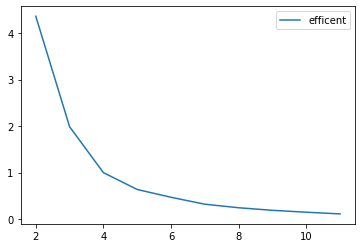

In [46]:
# 6 задача 
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
distlist = np.empty(10)

X = np.array([data[:, 2], data[:, 3]])
X = X.transpose()
for i in range(2,12):
    colors, efficent = kmeans(X, i)
    distlist[i-2] = efficent
plt.plot(range(2,12), distlist, label = 'efficent')
plt.legend()
plt.grid(False)



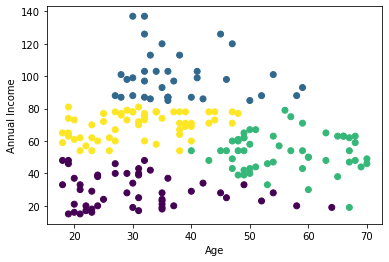

In [47]:
colors, efficent = kmeans(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=colors);
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

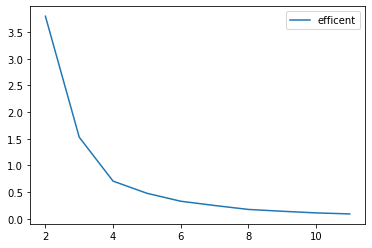

In [48]:
X = np.array([data[:, 2], data[:, 4]])
X = X.transpose()
for i in range(2,12):
    colors, efficent = kmeans(X, i)
    distlist[i-2] = efficent
plt.plot(range(2,12), distlist, label = 'efficent')
plt.legend()
plt.grid(False)

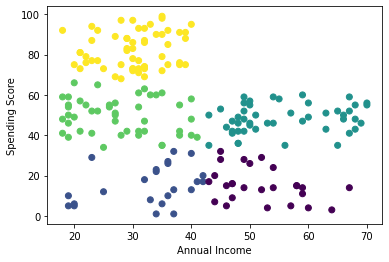

In [49]:
colors, distoration = kmeans(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=colors);
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

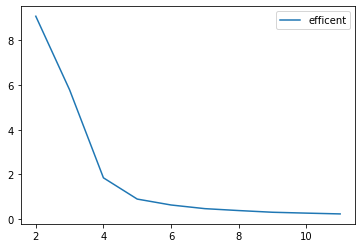

In [53]:
X = np.array([data[:, 3], data[:, 4]])
X = X.transpose()
for i in range(2,12):
    colors, efficent = kmeans(X, i)
    distlist[i-2] = efficent
plt.plot(range(2,12), distlist, label = 'efficent')
plt.legend()
plt.grid(False)

In [ ]:
colors, distoration = kmeans(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=colors);
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
## везде оптимально брать 4 кластера 